In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/EC-Earth3-AerChem_diag_2014(0319).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [4]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 3.5*10**(-13)*np.exp(430/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 1.63*10**(-10)*np.exp(60/data['tas'])

data['o3prod_mole'] = data['o3prod']*6.022*10**17
data['o3loss_mole'] = data['o3loss']*6.022*10**17

data['lossch4_mole'] = data['lossch4']*6.022*10**17
data['lossco_mole'] = data['lossco']*6.022*10**17
data['k_ch3o2_ch3o2'] = 9.5*10**(-14)*np.exp(390/data['tas'])

In [5]:
data['a'] = 2*data['k_ch3o2_ch3o2']
data['b'] = data['k_no_ch3o2']*data['no_mole']
data['c'] = -data['lossch4_mole']

In [6]:
data['ch3o2_mole'] = (-data['b'] + np.sqrt(data['b']**2 - 4*data['a']*data['c']))/(2*data['a'])

In [7]:
data['ratio_ch3o2_oh'] = data['ch3o2_mole']/data['oh_mole']
data['ratio_ch3o2_oh'].describe()

count    194400.000000
mean       1169.089643
std        3890.720091
min           0.008997
25%          43.681619
50%         156.530533
75%         379.503082
max       43988.339982
Name: ratio_ch3o2_oh, dtype: float64

In [8]:
data['P2'] = data['k_no_ch3o2']*data['no_mole']*data['ch3o2_mole']
data['P2_frac'] = data['P2']/data['o3prod_mole']
data['P2_frac'].describe()

count    194400.000000
mean          0.391329
std           0.287610
min           0.000872
25%           0.136532
50%           0.373760
75%           0.633612
max           4.599979
Name: P2_frac, dtype: float64

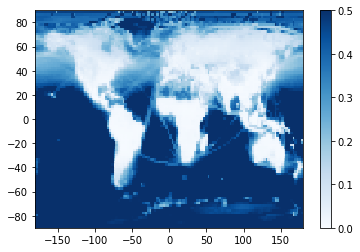

In [9]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
#data_land = data_land[data_land['latitude'] >= -60]
#data_land = data_land[data_land['P2_frac'] <1]
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P2_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [10]:
data_mean['P2_frac'].describe()

count    16200.000000
mean         0.391329
std          0.252359
min          0.002736
25%          0.146963
50%          0.417667
75%          0.628634
max          1.222045
Name: P2_frac, dtype: float64

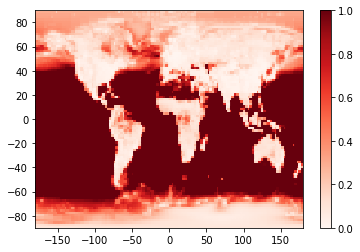

In [25]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
#data_land = data_land[data_land['latitude'] >= -60]
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ch3o2_mole']*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=1, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [12]:
data['P3'] = data['o3prod_mole'] - data['P1'] - data['P2']
data['P3_frac'] = data['P3']/data['o3prod_mole']
data['P3_frac'].describe()

count    194400.000000
mean          0.311721
std           0.363228
min          -3.692632
25%           0.019596
50%           0.284489
75%           0.550418
max           0.995918
Name: P3_frac, dtype: float64

In [13]:
data['k_no_ro2'] = 2.60*10**(-12)*np.exp(365/data['tas'])
data['ro2_mole'] = data['P3']/data['k_no_ro2']/data['no_mole']
data['ro2_mole'].describe()

count    1.944000e+05
mean     1.641157e+08
std      4.816673e+08
min     -2.123658e+08
25%      5.642741e+05
50%      1.783283e+07
75%      1.057584e+08
max      7.158850e+09
Name: ro2_mole, dtype: float64

In [14]:
data['k_no_ro2'].describe()

count    1.944000e+05
mean     9.700454e-12
std      1.031973e-12
min      8.319359e-12
25%      8.901046e-12
50%      9.367557e-12
75%      1.006158e-11
max      1.418344e-11
Name: k_no_ro2, dtype: float64

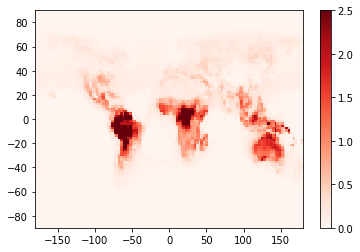

In [15]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ro2_mole']*10**(-9)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=2.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [16]:
data['P5'] = data['k_o3_oh']*data['o3_mole']*data['oh_mole']
data['P5_frac'] = data['P5']/data['o3loss_mole']

In [17]:
data['P6'] = data['k_o3_ho2']*data['o3_mole']*data['ho2_mole']
data['P6_frac'] = data['P6']/data['o3loss_mole']

In [18]:
data['ratio_P1_P2'] = data['P1']/data['P2']
data['ratio_P1_P2'].describe()

count    194400.000000
mean          1.566919
std           1.840336
min           0.008551
25%           0.515878
50%           1.014595
75%           2.077020
max          62.800982
Name: ratio_P1_P2, dtype: float64

In [19]:
data['ratio_P5_P6'] = data['P5']/data['P6']
data['ratio_P5_P6'].describe()

count    194400.000000
mean          0.656810
std           1.879920
min           0.029752
25%           0.156615
50%           0.239514
75%           0.423767
max         116.628379
Name: ratio_P5_P6, dtype: float64

In [20]:
data = data.drop(['a','b','c','country_y'], axis=1)
data = data.rename(columns={'country_x':'country'})
data

,longitude,latitude,t,loc,o3,o3loss,o3prod,eminox,emivoc,tas,...,P3,P3_frac,k_no_ro2,ro2_mole,P5,P5_frac,P6,P6_frac,ratio_P1_P2,ratio_P5_P6
0,1.0,-89.0,1.0,911.0,1.918366e-08,5.820803e-14,7.145326e-14,0.000000e+00,0.000000e+00,248.75261,...,-5828.610018,-0.135457,1.127776e-11,-6.519824e+06,8391.599083,0.239398,31595.939035,0.901379,1.637921,0.265591
1,3.0,-89.0,1.0,2911.0,1.918366e-08,5.820803e-14,7.145326e-14,0.000000e+00,0.000000e+00,248.71443,...,-5843.438377,-0.135802,1.128030e-11,-6.533935e+06,8410.833681,0.239947,31596.713030,0.901401,1.638688,0.266193
2,5.0,-89.0,1.0,4911.0,1.918151e-08,5.803789e-14,7.134267e-14,0.000000e+00,0.000000e+00,248.67625,...,-5867.985496,-0.136584,1.128284e-11,-6.549101e+06,8425.643715,0.241074,31516.854449,0.901759,1.640392,0.267338
3,7.0,-89.0,1.0,6911.0,1.917528e-08,5.749123e-14,7.101957e-14,0.000000e+00,0.000000e+00,248.63808,...,-5807.193027,-0.135784,1.128539e-11,-6.473771e+06,8419.615391,0.243192,31365.352735,0.905957,1.649014,0.268437
4,9.0,-89.0,1.0,8911.0,1.917528e-08,5.749123e-14,7.101957e-14,0.000000e+00,0.000000e+00,248.59988,...,-5818.525870,-0.136049,1.128793e-11,-6.483945e+06,8430.283440,0.243500,31362.521658,0.905876,1.649599,0.268801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194395,-9.0,89.0,12.0,-8911.0,2.716963e-08,1.193308e-14,6.409461e-16,9.685218e-14,7.394706e-15,246.50143,...,265.851352,0.688774,1.142990e-11,1.558197e+06,18.578912,0.002585,404.594821,0.056302,0.778744,0.045920
194396,-7.0,89.0,12.0,-6911.0,2.717685e-08,1.164388e-14,5.783149e-16,8.234587e-14,6.287143e-15,246.50337,...,238.309444,0.684284,1.142977e-11,1.630117e+06,18.456266,0.002632,398.193360,0.056788,0.675758,0.046350
194397,-5.0,89.0,12.0,-4911.0,2.719129e-08,6.036053e-15,1.296579e-22,0.000000e+00,0.000000e+00,246.50531,...,0.000047,0.596162,1.142964e-11,1.070016e+07,18.468437,0.005081,429.871022,0.118262,0.047283,0.042963
194398,-3.0,89.0,12.0,-2911.0,2.719129e-08,6.036053e-15,1.296579e-22,0.000000e+00,0.000000e+00,246.50725,...,0.000047,0.596153,1.142950e-11,1.070022e+07,18.779260,0.005166,430.180994,0.118347,0.047316,0.043654


In [21]:
data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/EC-Earth3-AerChem_diag_2014(0320).csv', index = False)

In [22]:
data_land = data.dropna()
ratio_P1_P2 = data_land['ratio_P1_P2'].median()
ratio_P5_P6 = data_land['ratio_P5_P6'].median()
P1_frac = data_land['P1_frac'].mean()
P2_frac = data_land['P2_frac'].mean()
P3_frac = data_land['P3_frac'].mean()
P5_frac = data_land['P5_frac'].mean()
P6_frac = data_land['P6_frac'].mean()
ratio_ho2_oh = data_land['ratio_ho2_oh'].median()
ratio_ch3o2_oh = data_land['ratio_ch3o2_oh'].median()

In [23]:
print("P1 fraction:    "+str(np.round(P1_frac,2)))
print("P2 fraction:    "+str(np.round(P2_frac,2)))
print("P3 fraction:    "+str(np.round(P3_frac,2)))
print("P5 fraction:    "+str(np.round(P5_frac,2)))
print("P6 fraction:    "+str(np.round(P6_frac,2)))
print("P1:P2 ratio:    "+str(np.round(ratio_P1_P2,2)))
print("P5:P6 ratio:    "+str(np.round(ratio_P5_P6,2)))
print("HO\u2082:OH ratio:   "+str(np.round(ratio_ho2_oh,1)))
print("CH\u2083O\u2082:OH ratio: "+str(np.round(ratio_ch3o2_oh,1)))

P1 fraction:    0.24
P2 fraction:    0.21
P3 fraction:    0.55
P5 fraction:    0.08
P6 fraction:    0.26
P1:P2 ratio:    2.25
P5:P6 ratio:    0.38
HO₂:OH ratio:   84.4
CH₃O₂:OH ratio: 36.1
